___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

## Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

### 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [9]:
df.shape

(200, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


---
---

### 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [5]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

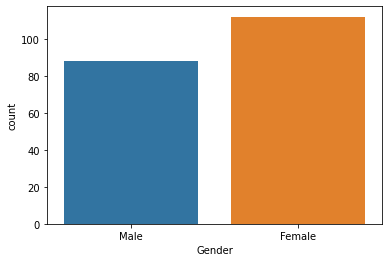

In [10]:
sns.countplot(data=df, x="Gender")

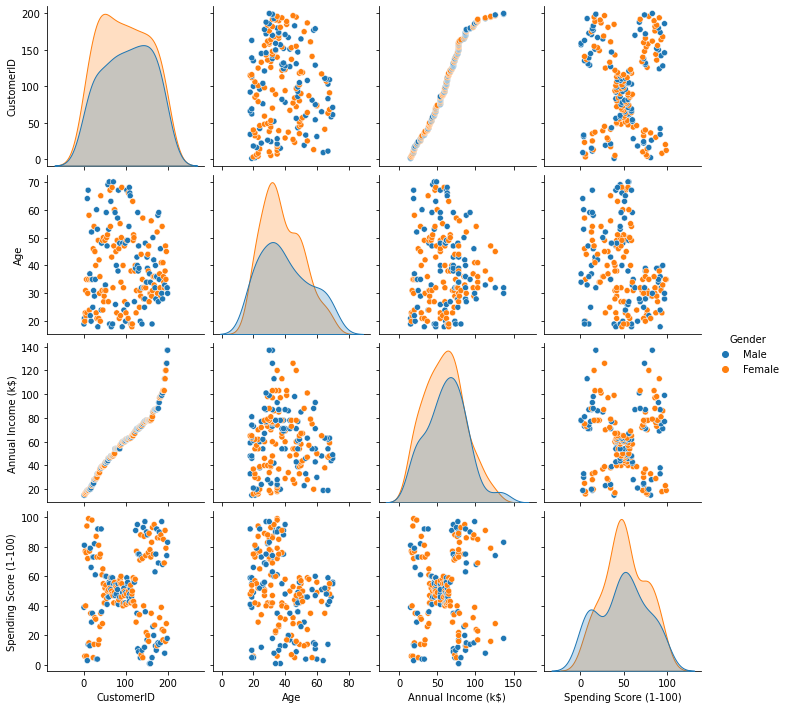

In [11]:
sns.pairplot(data=df, hue="Gender");

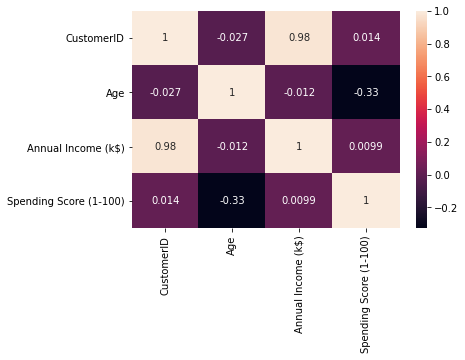

In [14]:
sns.heatmap(df.corr(), annot=True);

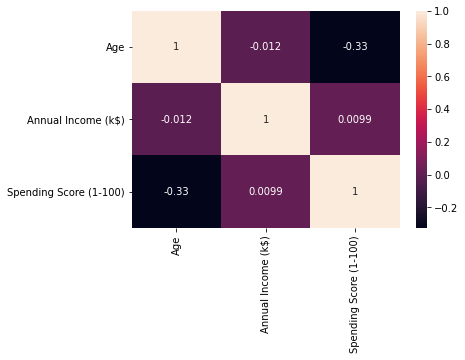

In [18]:
sns.heatmap(df.drop("CustomerID", axis=1).corr(), annot=True);

In [19]:
df.drop("CustomerID", axis=1, inplace=True)

In [21]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


---
---

### 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [22]:
X =  pd.get_dummies(df, drop_first=True)

In [23]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [25]:
X.shape

(200, 4)

In [26]:
from sklearn.cluster import KMeans

In [27]:
K_means_model = KMeans(n_clusters=5, random_state=42)

In [28]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [29]:
K_means_model.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [30]:
# !pip install pyclustertend
from pyclustertend import hopkins

In [31]:
X.shape[0]

200

In [32]:
hopkins(X, X.shape[0])
# Burada ki X.shape[0] satır sayımız, X ise DataFrame
# Hopkins test verimizin uniform mu rastgele dağılım olduğunu tespit etmek için kullanıyoruz. 
# Verimizin kümeleme yapılabilmesi için rastgele dağılmış olması lazım.
# Threshhold değeri 0.5 den küçük olduğu için modelimiz kümeleme için uygun
# Bu değer ne kadar düşükse (sıfır en iyi değer) model o kadar iyi kümeleme yapıyor. 

0.31716020895817904

In [33]:
X["Clusters"] = K_means_model.labels_

In [36]:
X.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
169,32,87,63,1,1
149,34,78,90,1,1
91,18,59,41,1,3
84,21,54,57,0,3
156,37,78,1,1,2
158,34,78,1,1,2
99,20,61,49,1,3
13,24,20,77,0,4
138,19,74,10,1,2
185,30,99,97,1,1


In [37]:
K_means_model.inertia_
# Inertia bir kümenin içindeki herbir verinin merkezine (küme merkezi) olan yakınlığının karesini toplanarak elde ediliyor.
# Bu değer ne kadar küçükse küme içerisindeki elemanlar (veriler) o kadar birbirine yakındır. (Variance düşük)
# Küme sayısı artıkça bu değer düşüyor. Çünkü artık her bir veri tek başına küme oluşturmaya başlıyor.

75427.71182424152

#### *ii. Determine optimal number of clusters*

Elbow Method

In [38]:
ssd = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

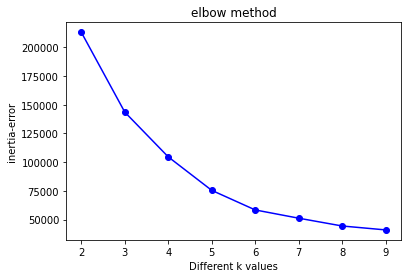

In [39]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")
# min cluster (küme) sayısıyla minimum hatayı (inertia) bulmak için keskin düşüşün durduğu noktanın başlangıcı seçiliyor. 
# Buradaki amaç her iki değeri de optimum seviyede seçmektir. Minimum küme sayısı ile mimimum inertia yı bulmaya çalışmalıyız.
# NOT: KMeans kümelemede küme içerisindeki elemanları birbirine yakın (minimum), kümeler arası uzaklık ise fazla (mazimum) olmalıdır.

In [40]:
ssd

[213176.84398976972,
 143603.60669497383,
 104585.9035376904,
 75427.71182424152,
 58363.18453563982,
 51164.97341743225,
 44372.15325358854,
 40954.16005496007]

In [41]:
pd.Series(ssd).diff()
# (diff()) fonksiyonu bir verinin bir önceki değer ile arasındaki farkı gösteriyor. (78.940-152.368=-73.427) gibi.
# İlk değerden önce veri olmadığı için NaN değerini veriyor.

0             NaN
1   -69573.237295
2   -39017.703157
3   -29158.191713
4   -17064.527289
5    -7198.211118
6    -6792.820164
7    -3417.993199
dtype: float64

In [42]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff
# DataFrame oluştururken index kullanırsak DataFrame NaN değerlerini almıyor. 
# Bu yüzden biz NaN değerleri de görmek için lamda func kullandık.

,0
1,NaN
2,69573.237295
3,39017.703157
4,29158.191713
5,17064.527289
6,7198.211118
7,6792.820164
8,3417.993199


<AxesSubplot:>

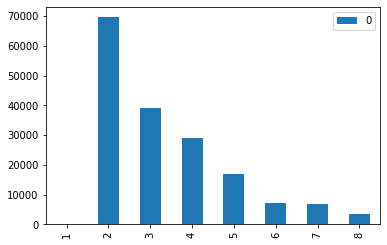

In [44]:
df_diff.plot(kind='bar')

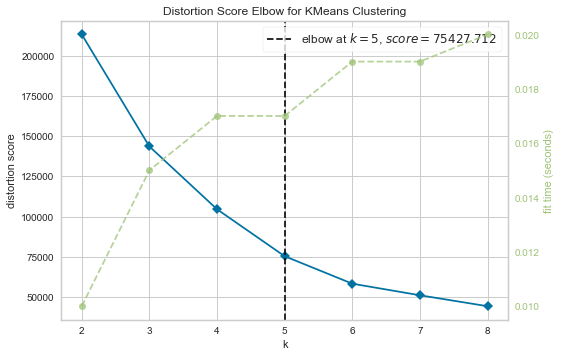

In [45]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# Not: yellowbrick aynı zamanda kümeler arasındaki  uzaklığa da bakıyor.

Silhouette analysis

In [46]:
from sklearn.metrics import silhouette_score

In [47]:
range_n_clusters = range(2,9)
for k in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")
# Not: silhouette_score ne kadar 1 e yakınsa kümeleme o kadar iyidir (Küme verileri içerinde yakınlık, kümeler arası uzaklık en iyi şekilde sağlanır.
# NOT: Biz burada değerlendirme yaparken bir önceki elbow metodundaki sonuçları da göz önünde bulundurmalıyız.

For n_clusters=2, the silhouette score is 0.29286665781608123
For n_clusters=3, the silhouette score is 0.38379950218069925
For n_clusters=4, the silhouette score is 0.40529769636216684
For n_clusters=5, the silhouette score is 0.44493777835059417
For n_clusters=6, the silhouette score is 0.45237002173768814
For n_clusters=7, the silhouette score is 0.4401653101734069
For n_clusters=8, the silhouette score is 0.4297011185157375


#### *iii. Apply K Means*

In [49]:
K_means = KMeans(n_clusters=5, random_state=42)

In [51]:
K_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [52]:
K_means.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [56]:
X_2 = X.copy()

In [58]:
X_2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
0,19,15,39,1,0
1,21,15,81,1,4
2,20,16,6,0,0
3,23,16,77,0,4
4,31,17,40,0,0


In [59]:
X_2["k_clusters"] = K_means.labels_

In [60]:
X_2.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
2,20,16,6,0,0
38,36,37,26,0,0
198,32,137,18,1,2
103,26,62,55,1,3
134,20,73,5,1,2
56,51,44,50,0,3
137,32,73,73,1,1
126,43,71,35,1,3
107,54,63,46,1,3
192,33,113,8,1,2


#### *iv. Visualizing and Labeling All the Clusters*

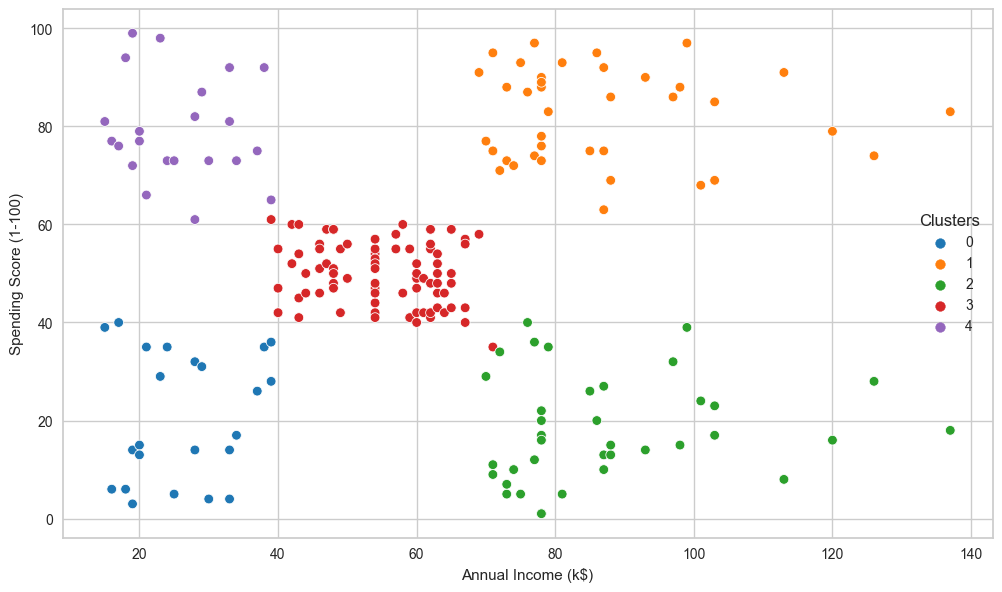

In [64]:
plt.figure(figsize=(12,7),dpi=100)
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Clusters", data=X_2, palette="tab10");

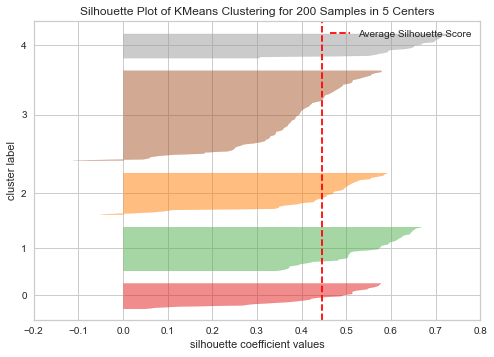

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans_model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(kmeans_model)
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();
# Karar verdiğimiz k=5 sayısı ile oluşturulan kümelerin silhouette_score larını bu kod ile kontrol ediyoruz.

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [72]:
X_2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,Clusters
0,19,15,39,1,0
1,21,15,81,1,4
2,20,16,6,0,0
3,23,16,77,0,4
4,31,17,40,0,0


In [73]:
clus_pred = X_2.iloc[:, [0, 1, 2, 3]].groupby("k_clusters").mean()
clus_pred
# KMeans ın her bir features için yaptığı tahminlerin ortalamasına bakarak en ayrışık features ları bulup modelimizi tekrar o fetures larla oluşturacağız.

KeyError: 'Clusters'

In [ ]:
sns.lineplot(data = clus_pred);

In [66]:
X[["Annual Income (k$)","Spending Score (1-100)"]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [68]:
X_3 = X[["Annual Income (k$)","Spending Score (1-100)"]]
X_3.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

### Hierarchical Clustering

#### *i. Determine optimal number of clusters using Dendogram*

#### ii. *Apply Agglomerative Clustering*

#### iii. *Visualizing and Labeling All the Clusters* 

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___